In [ ]:
# Suraj Singh Chahar IIT R
# This file serves as the main code for the capstone project (Summer Analytics) IIT G, though there is a whole seperate report explaining the workflow and
# inferences obtained from EDA I have tried put some of them here so the workflow is understandable also comments are added for the coding part.

In [ ]:
!pip install pathway bokeh --quiet                                              # installs the libs containing pathway and bokeh(visualization)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.6/777.6 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.6/244.6 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.4/318.4 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.8/985.8 kB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np                                               # these are the basic libs which will be used for processing the data and make models
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import pathway as pw                                             # importing pathway
import bokeh.plotting
import panel as pn                                               # this is used to wrap the  plots for presenting in Collab itself

In [ ]:
# Loading the dataset and basic preprocessing

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset.csv')           # loading the dataset(I mounted the drive for this)

In [ ]:
df.head()                                                        # for having a breif look at the dataset

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00


In [ ]:
df.info()                                                        # this gives basic info of the dataframe like dtypes present, value_counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18368 entries, 0 to 18367
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      18368 non-null  int64  
 1   SystemCodeNumber        18368 non-null  object 
 2   Capacity                18368 non-null  int64  
 3   Latitude                18368 non-null  float64
 4   Longitude               18368 non-null  float64
 5   Occupancy               18368 non-null  int64  
 6   VehicleType             18368 non-null  object 
 7   TrafficConditionNearby  18368 non-null  object 
 8   QueueLength             18368 non-null  int64  
 9   IsSpecialDay            18368 non-null  int64  
 10  LastUpdatedDate         18368 non-null  object 
 11  LastUpdatedTime         18368 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 1.7+ MB


In [ ]:
df.describe()                                                                                         # this gives us data of central tendencies of the numerical columns

,ID,Capacity,Latitude,Longitude,Occupancy,QueueLength,IsSpecialDay
count,18368.000000,18368.000000,18368.000000,18368.000000,18368.000000,18368.000000,18368.000000
mean,9183.500000,1605.214286,25.706547,90.751170,731.084059,4.587925,0.150915
std,5302.529208,1131.153886,1.582749,3.536636,621.164982,2.580062,0.357975
min,0.000000,387.000000,20.000035,78.000003,2.000000,0.000000,0.000000
25%,4591.750000,577.000000,26.140048,91.727995,322.000000,2.000000,0.000000
50%,9183.500000,1261.000000,26.147482,91.729511,568.000000,4.000000,0.000000
75%,13775.250000,2803.000000,26.147541,91.736172,976.000000,6.000000,0.000000
max,18367.000000,3883.000000,26.150504,91.740994,3499.000000,15.000000,1.000000


In [ ]:
df.isnull().sum()                                                                                                       # for detecting missing values present in the dataset

,0
ID,0
SystemCodeNumber,0
Capacity,0
Latitude,0
Longitude,0
Occupancy,0
VehicleType,0
TrafficConditionNearby,0
QueueLength,0
IsSpecialDay,0


In [ ]:
# We see that no missing values are present in the dataset, this saves us a big part of the preprocessing.

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# We see that no duplicate values are there.

In [ ]:
# Now we will perform EDA on the dataset to look for patterns, we will start by analysing all the columns individually and combining them with others
# and forming new features from the interpretations and also clear any anamolies present.

In [ ]:
# SystemCodeNumber

df.SystemCodeNumber.unique()                                      # gives the different unique values present in the column

array(['BHMBCCMKT01', 'BHMBCCTHL01', 'BHMEURBRD01', 'BHMMBMMBX01',
       'BHMNCPHST01', 'BHMNCPNST01', 'Broad Street', 'Others-CCCPS105a',
       'Others-CCCPS119a', 'Others-CCCPS135a', 'Others-CCCPS202',
       'Others-CCCPS8', 'Others-CCCPS98', 'Shopping'], dtype=object)

In [ ]:
# these are actually the 14 parking lots so lets rename this column

df = df.rename(columns={'SystemCodeNumber': 'ParkingLotID'})

In [ ]:
df.ParkingLotID.value_counts()                                   # gives the number of values of each parking lot

,count
ParkingLotID,
BHMBCCMKT01,1312
BHMBCCTHL01,1312
BHMEURBRD01,1312
BHMMBMMBX01,1312
BHMNCPHST01,1312
BHMNCPNST01,1312
Broad Street,1312
Others-CCCPS105a,1312
Others-CCCPS119a,1312


In [ ]:
# The count for each is same also there is no point in studying this column individually it makes sense to study it with columns like
# occupancy, capacity, Queue length and traffic conditions.

In [ ]:
df.groupby('ParkingLotID')['Capacity'].value_counts()                         # gives the capacities off the different lots

,,count
ParkingLotID,Capacity,
BHMBCCMKT01,577,1312
BHMBCCTHL01,387,1312
BHMEURBRD01,470,1312
BHMMBMMBX01,687,1312
BHMNCPHST01,1200,1312
BHMNCPNST01,485,1312
Broad Street,690,1312
Others-CCCPS105a,2009,1312
Others-CCCPS119a,2803,1312


In [ ]:
# We can create a seperate column which gives percent of the lot which is occupied studying only Occupancy of the lots will be misleading due to their
# different capacities.

In [ ]:
df['OccupancyRate'] = df['Occupancy'] / df['Capacity']                         # OccupancyRate = Occupancy / Capacity

In [ ]:
# Now some plots to study the column

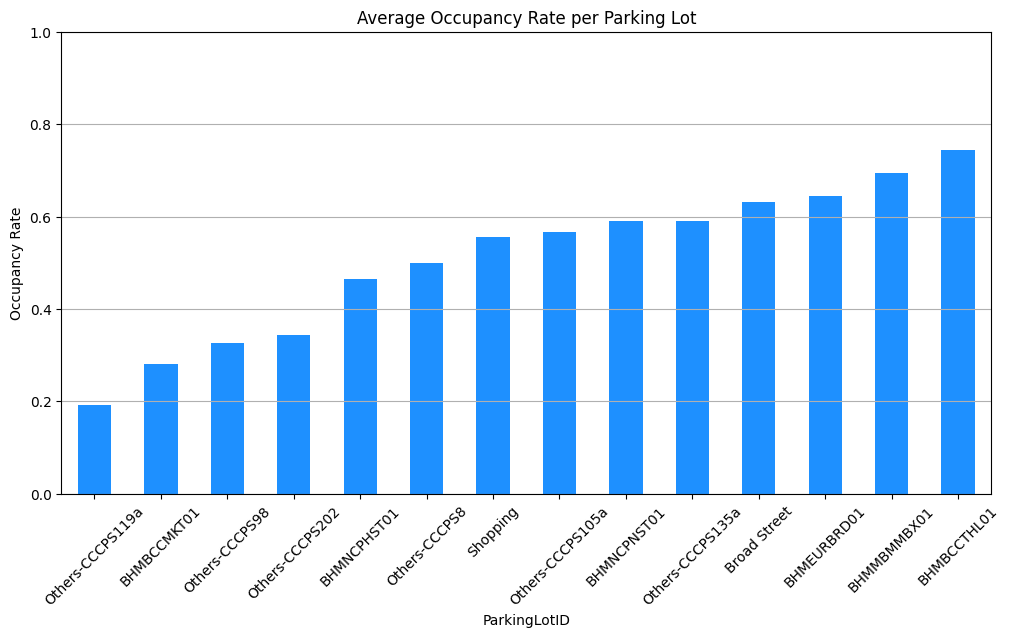

In [ ]:
lot_avg_occupancy = df.groupby('ParkingLotID')['OccupancyRate'].mean().sort_values()      # gives the mean occupancies of different lots and also sorts them

plt.figure(figsize=(12,6))                                                                # size
lot_avg_occupancy.plot(kind='bar', color='dodgerblue')                                    # plotting function (matplotlib)
plt.title('Average Occupancy Rate per Parking Lot')                                       # title
plt.ylabel('Occupancy Rate')                                                              # axis label
plt.ylim(0,1)
plt.grid(axis='y')
plt.xticks(rotation=45)                                                                   # increses readability
plt.show()                                                                                # shows the plot

In [ ]:
# The occupancy rates among the various parking lots vary significantly, ranging from approximately 20% for "Others-CCCPS119a" to over 70% for "BHMBCCCTHL01,"
# indicating a wide spectrum of demand or utilization across different locations.
# Parking lots like "BHMBCCCTHL01," "BHMBMBMMBX01," and "BHMEURBRD01" show the highest average occupancy rates, suggesting these are the most heavily utilized or in-demand parking facilities depicted.

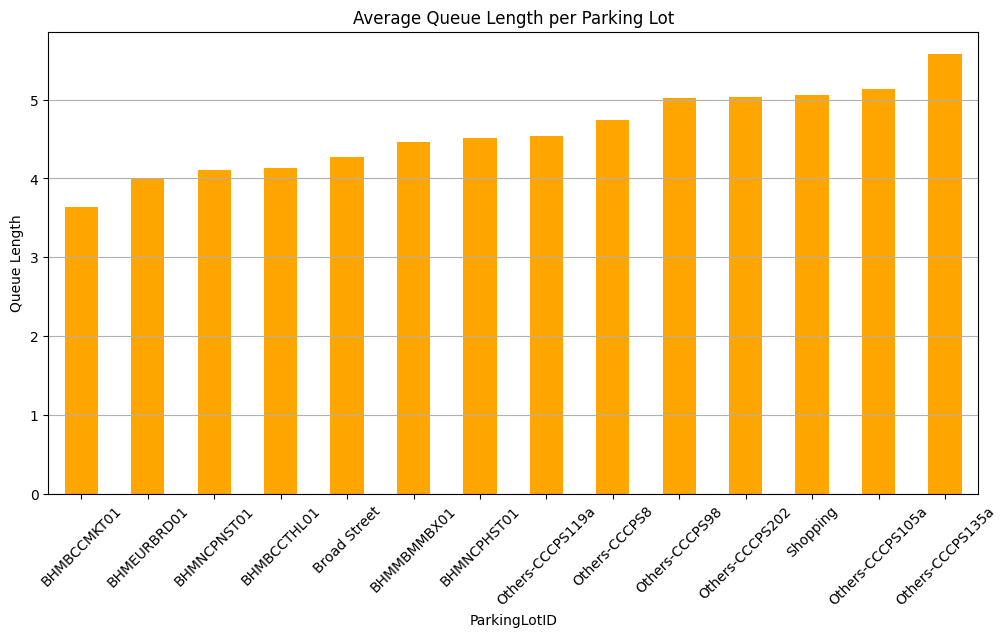

In [ ]:
lot_avg_queue = df.groupby('ParkingLotID')['QueueLength'].mean().sort_values()                         # gives the average queue length of different lots and also sorts them

plt.figure(figsize=(12,6))
lot_avg_queue.plot(kind='bar', color='orange')
plt.title('Average Queue Length per Parking Lot')
plt.ylabel('Queue Length')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# The average queue lengths vary noticeably across parking lots, with "BHMBCCMKT01" having the shortest average queue and "Others-CCCPS135a" having the
# longest. This suggests significant differences in the waiting times or congestion experienced at different parking facilities.
# Several parking lots, including "Others-CCCPS135a," "Others-CCCPS105a," and "Shopping," consistently exhibit higher average queue lengths, indicating that these
# locations frequently experience greater demand or bottlenecks compared to others, leading to longer waiting times for parking spots.

/tmp/ipython-input-27-3562368285.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(                                                                   # boxplot for understanding the variations in queue lengths


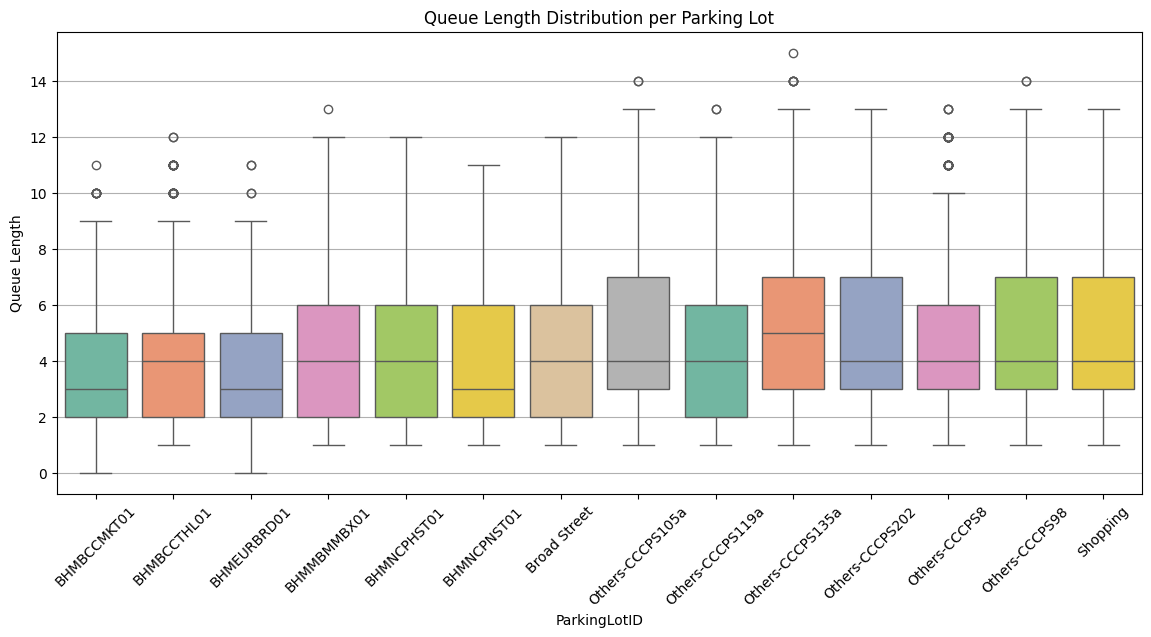

In [ ]:
import seaborn as sns                                                          # this lib helps us use pots liek boxplots,barplots etc

plt.figure(figsize=(14,6))
sns.boxplot(                                                                   # boxplot for understanding the variations in queue lengths
    data=df,
    x='ParkingLotID',
    y='QueueLength',
    palette='Set2'
)
plt.title('Queue Length Distribution per Parking Lot')
plt.ylabel('Queue Length')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
# While parking lots like "BHMBCCMKT01" and "BHMBCCCTHL01" show a relatively tight distribution of queue lengths with lower medians, others such as "Others-CCCPS105a"
# and "Others-CCCPS135a" exhibit higher median queue lengths and wider interquartile ranges, indicating more variable and often longer queues.
# The presence of numerous outliers across several parking lots, especially "Others-CCCPS135a," "Others-CCCPS202," and "Others-CCCPS58', suggests that while typical
# queue lengths might be manageable, these locations periodically experience significantly extended waiting times or unusual congestion events.

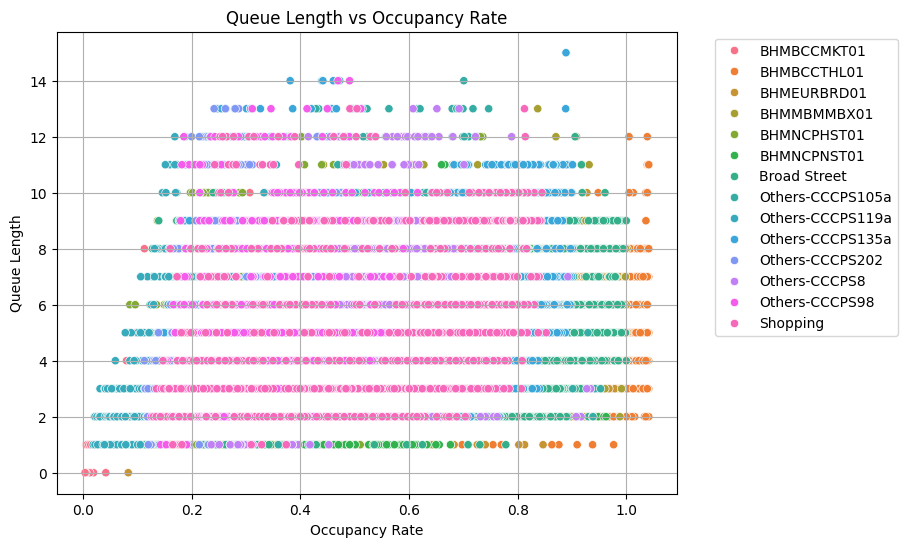

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(                                                              # scatterplot for understanding the variations in queue lengths wrt Occupancy rates
    data=df,
    x='OccupancyRate',
    y='QueueLength',
    hue='ParkingLotID'                                                        # givs info about the parking lots through different colours
)
plt.title('Queue Length vs Occupancy Rate')
plt.xlabel('Occupancy Rate')
plt.ylabel('Queue Length')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
# There isn't a clear, strong linear correlation between occupancy rate and queue length across all parking lots;
# Queue lengths can vary significantly, suggesting that factors other than just occupancy, such as entry/exit efficiency or specific peak times, also heavily influence queue formation.
# While some parking lots (e.g., "BHMEURBRD01" and "BHMBCCMKT01") tend to have lower queue lengths even at higher occupancy rates, others like "Others-CCCPS135a" and "Shopping" frequently
# experience longer queues across a broad spectrum of occupancy rates, indicating consistent congestion challenges for those specific locations.

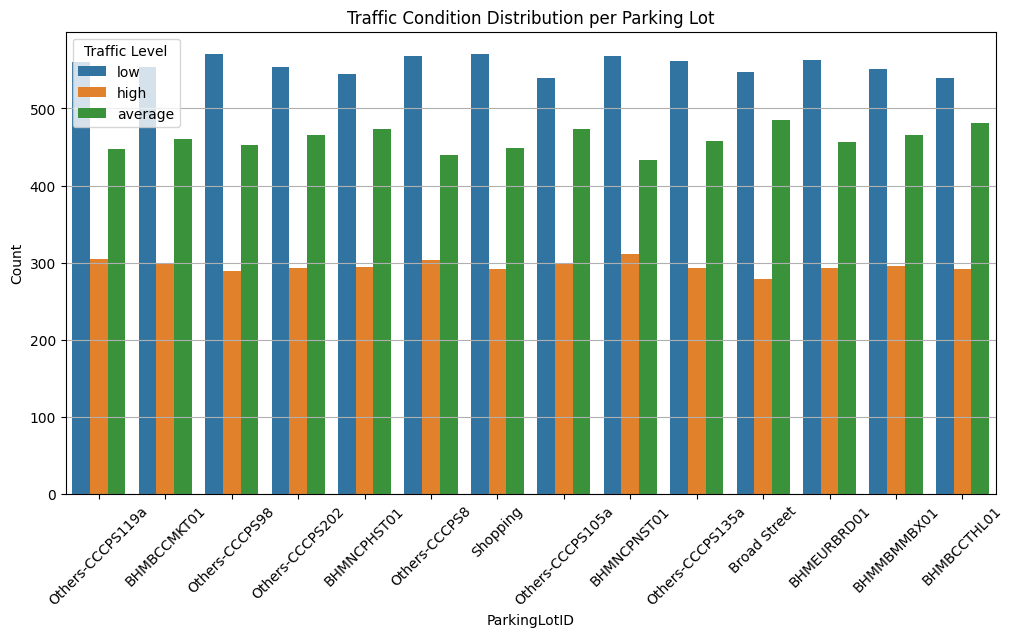

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(                                                               # countplot for understanding the variations in traffic conditions in different parking lots
    data=df,
    x='ParkingLotID',
    hue='TrafficConditionNearby',
    order=lot_avg_occupancy.index                                            # Keeps order same as occupancy
)
plt.title('Traffic Condition Distribution per Parking Lot')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Traffic Level')
plt.grid(axis='y')
plt.show()

In [ ]:
# Most parking lots consistently experience a higher frequency of "low" traffic conditions compared to "high" or "average" conditions, suggesting that severe congestion
# is not the predominant state for the majority of the time, though "average" traffic is also notably frequent.
# While the proportion of "high" traffic is generally the smallest across all parking lots, there's a relatively consistent presence of "average" traffic, indicating
# that parking lots frequently operate at moderate levels of busyness.

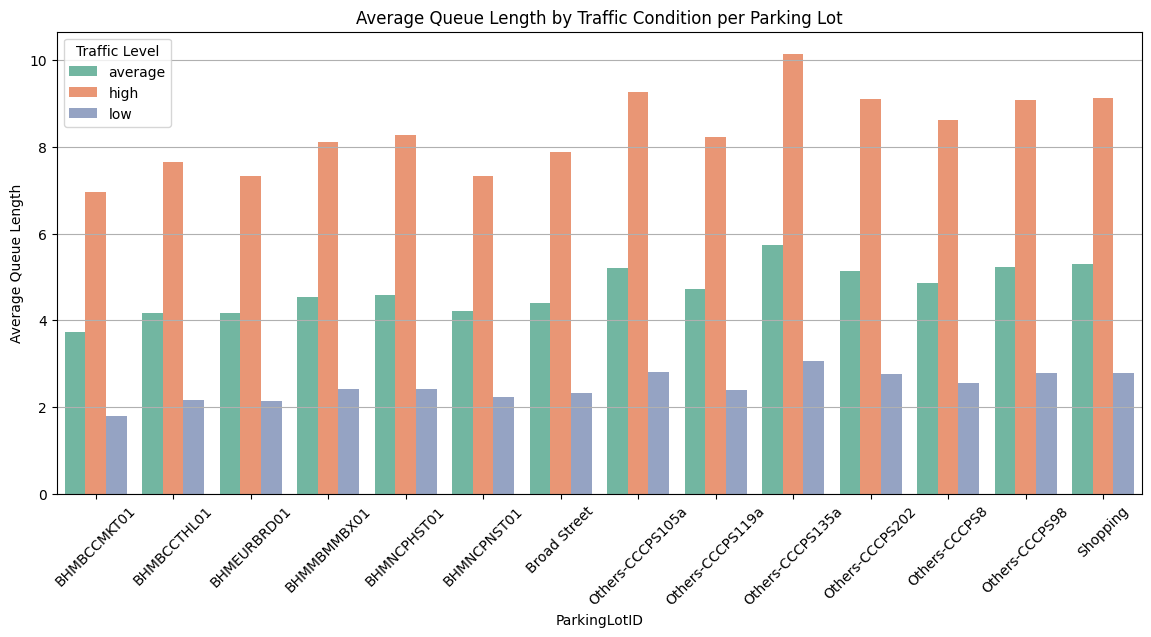

In [ ]:
grouped = df.groupby(['ParkingLotID', 'TrafficConditionNearby'])['QueueLength'].mean().reset_index()   # makes a seperate dataframe with values grouped wrt lots and traffic conditions

plt.figure(figsize=(14,6))
sns.barplot(                                                                                           # plots average queue length as y axis and lots on x axis
    data=grouped,
    x='ParkingLotID',
    y='QueueLength',
    hue='TrafficConditionNearby',                                                                      # color codes the traffic conditions at different lots
    palette='Set2'
)
plt.title('Average Queue Length by Traffic Condition per Parking Lot')
plt.ylabel('Average Queue Length')
plt.xticks(rotation=45)
plt.legend(title='Traffic Level')
plt.grid(axis='y')
plt.show()

In [ ]:
# Regardless of the parking lot, "high" traffic conditions consistently result in significantly longer average queue lengths compared to "average" and "low" traffic conditions.
# Even under "low" traffic conditions, some parking lots like "Others-CCCPS105a" and "Others-CCCPS119a" still experience noticeable average queue lengths, suggesting
# that these specific locations might have some inherent design limitations that lead to queues even when traffic isn't at its peak.

/tmp/ipython-input-35-3480502221.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='VehicleType', palette='pastel')                          # countplot for checking the distribution of different vehicles incoming


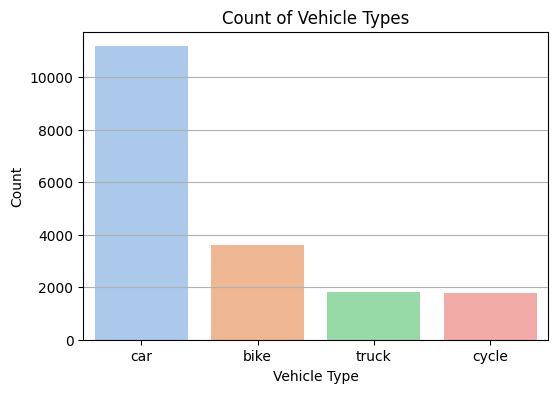

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='VehicleType', palette='pastel')                          # countplot for checking the distribution of different vehicles incoming
plt.title('Count of Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [ ]:
# Cars are by far the most numerous vehicle type, with their count exceeding the combined total of bikes, trucks, and cycles.

/tmp/ipython-input-37-3727183764.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='VehicleType', y='OccupancyRate', palette='Set2')       # for plotting occupancy rates wrt types of vehicles


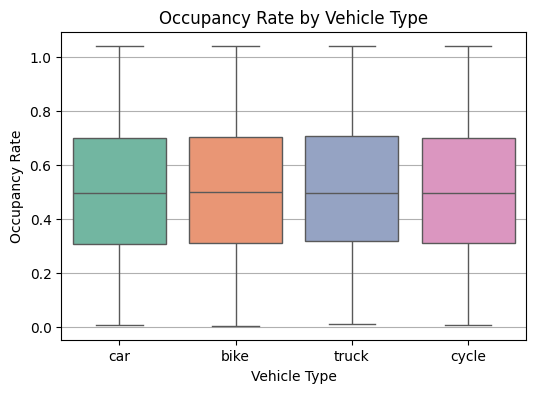

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='VehicleType', y='OccupancyRate', palette='Set2')       # for plotting occupancy rates wrt types of vehicles
plt.title('Occupancy Rate by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Occupancy Rate')
plt.grid(axis='y')
plt.show()

In [ ]:
# The median occupancy rate is similar across all vehicle types (car, bike, truck, and cycle), hovering around 0.5,
# while the overall spread and maximum occupancy also appear quite consistent for all categories.

/tmp/ipython-input-39-1187935898.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='VehicleType', y='QueueLength', palette='Set3')     # boxplot for understanding the variation in Queue length wrt types of vehicles


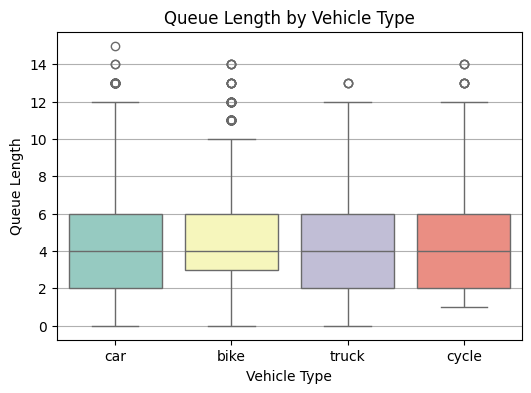

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='VehicleType', y='QueueLength', palette='Set3')     # boxplot for understanding the variation in Queue length wrt types of vehicles
plt.title('Queue Length by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Queue Length')
plt.grid(axis='y')
plt.show()

In [ ]:
# While all vehicle types experience a median queue length between approximately 2 and 4, indicating some level of waiting, "cars" generally show a slightly higher median queue length
# compared to "bikes," "trucks," and "cycles."

/tmp/ipython-input-41-178566116.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='IsSpecialDay', palette='cool')                     # for understanding the distribution of Holidays or special events


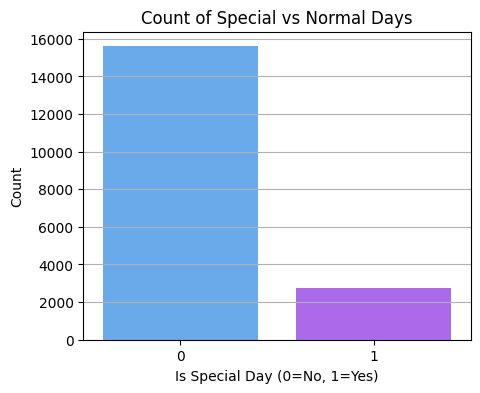

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='IsSpecialDay', palette='cool')                     # for understanding the distribution of Holidays or special events
plt.title('Count of Special vs Normal Days')
plt.xlabel('Is Special Day (0=No, 1=Yes)')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

/tmp/ipython-input-42-2611496434.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='IsSpecialDay', y='OccupancyRate', palette='cool')                   # for understanding the effect of these special days on occupancy rates


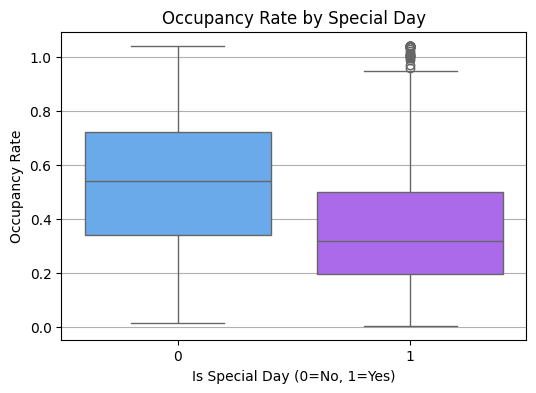

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='IsSpecialDay', y='OccupancyRate', palette='cool')                   # for understanding the effect of these special days on occupancy rates
plt.title('Occupancy Rate by Special Day')
plt.xlabel('Is Special Day (0=No, 1=Yes)')
plt.ylabel('Occupancy Rate')
plt.grid(axis='y')
plt.show()

In [ ]:
# On non-special days , the median occupancy rate is notably higher with a wider interquartile range, indicating more varied and generally higher utilization.
# Conversely, on special days, the median occupancy rate is significantly lower, and the distribution is tighter, suggesting that parking facilities are, on average,
# less occupied during these times, despite a few outliers showing near full occupancy.

/tmp/ipython-input-44-1689436052.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='IsSpecialDay', y='QueueLength', palette='Spectral')           #  understanding the effect on queue length


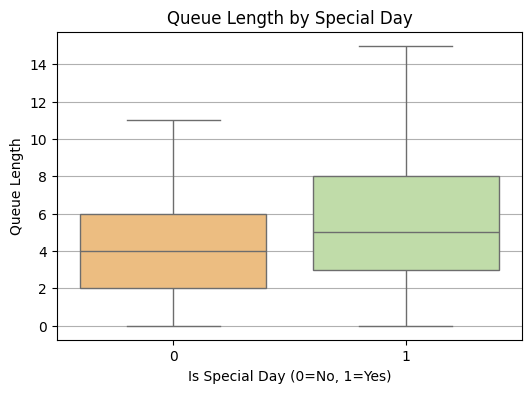

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='IsSpecialDay', y='QueueLength', palette='Spectral')           #  understanding the effect on queue length
plt.title('Queue Length by Special Day')
plt.xlabel('Is Special Day (0=No, 1=Yes)')
plt.ylabel('Queue Length')
plt.grid(axis='y')
plt.show()

In [ ]:
# On special days, the median queue length is substantially higher and the overall distribution of queue lengths is shifted upwards compared to non-special days.
# While both day types show a wide range of queue lengths, special days also exhibit a greater potential for extremely long queues, with the upper
# whisker, indicating more severe congestion during these periods.

In [ ]:
# Now we will look at the time series columns like data and time, I have combined the two of them into one column for better info this will play a important role in biluding the model.

In [ ]:
df['Timestamp'] = pd.to_datetime(                                                 # simple use of datetime of pandas to form and format the time columns
    df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime'],
    format='%d-%m-%Y %H:%M:%S'
)

In [ ]:
df = df.sort_values(['ParkingLotID', 'Timestamp']).reset_index(drop=True)         # sorting the dataframe on the basis of lots and timestamp

In [ ]:
# We might require spsecific time and days of week in order to calculate if there is any rush or decrement on certain days and time.

In [ ]:
df['Hour'] = df['Timestamp'].dt.hour
df['Minute'] = df['Timestamp'].dt.minute
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek                                    # 0=Monday, 6=Sunday

/tmp/ipython-input-51-3271994465.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='viridis')                               # countplot depicting volume of records per hour


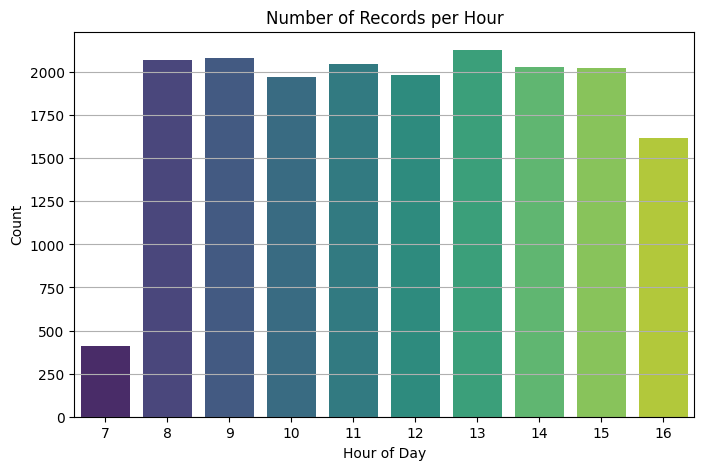

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Hour', data=df, palette='viridis')                               # countplot depicting volume of records per hour
plt.title('Number of Records per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [ ]:
# We see that contrary to starting time of 8:00 AM there are values of before that too. These might be of the working staff.
# There's a noticeable decline in the number of records in the late afternoon (around 4 PM), suggesting a decrease in data collection or activity towards the end of the observed period.

/tmp/ipython-input-53-704053750.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Hour', y='OccupancyRate', data=df, palette='coolwarm')                     # boxplot for understanding the variation in occupancy rates wrt hours


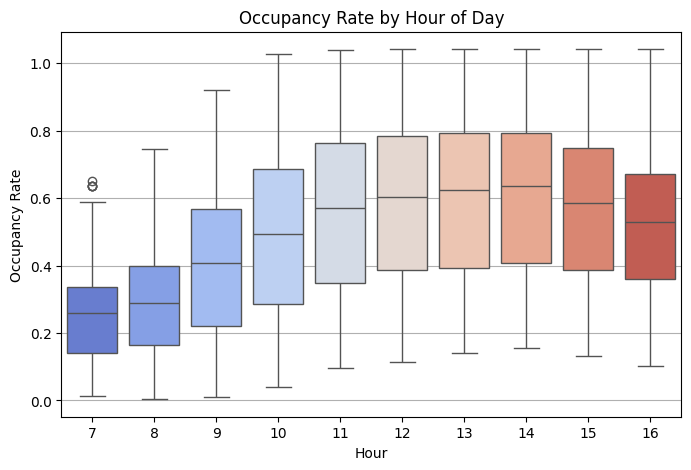

In [ ]:
plt.figure(figsize=(8,5))                                                                 # this is one of the most important plot of EDA
sns.boxplot(x='Hour', y='OccupancyRate', data=df, palette='coolwarm')                     # boxplot for understanding the variation in occupancy rates wrt hours
plt.title('Occupancy Rate by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Occupancy Rate')
plt.grid(axis='y')
plt.show()

In [ ]:
# We see that afternoon hours see the most increament in the occupancy rates.

In [ ]:
# The median occupancy rate generally increases throughout the morning, peaking in the early afternoon (12 PM to 2 PM).
# While the median occupancy stabilizes in the afternoon, the interquartile range  also suggests that the variability in occupancy rates remains considerable during peak hours,
# indicating that even within these busy periods, there's a range of utilization.

/tmp/ipython-input-56-3169889936.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Hour', y='QueueLength', data=df, palette='Spectral')                    # for understanding the variation in queue length


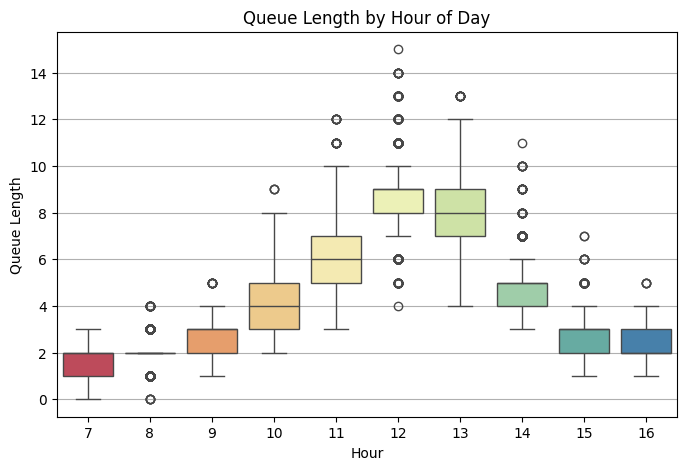

In [ ]:
plt.figure(figsize=(8,5))                                                              # also one of the most important plot of EDA
sns.boxplot(x='Hour', y='QueueLength', data=df, palette='Spectral')                    # for understanding the variation in queue length
plt.title('Queue Length by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Queue Length')
plt.grid(axis='y')
plt.show()

In [ ]:
# This plot confimrs that the rush is more at the noon time.
# Queue lengths also gradually increase, peaking significantly around midday.
# After the midday peak, queue lengths steadily decrease in the afternoon (from 2 PM onwards), returning to much shorter lengths by 4 PM,
# although outliers indicating unusually long queues can still be observed at various hours.

In [ ]:
# Encoding of Categorical columns

In [ ]:
traffic_map = {'low': 0.3, 'average': 0.6, 'high': 1}                               # mapping the traffic condtions to weights ,justification of using these weights is present in the report.
df['TrafficConditionNearby'] = df['TrafficConditionNearby'].map(traffic_map)        # applying the weights

In [ ]:
vehicle_weights = {'car': 1.0, 'bike': 0.5, 'truck': 1.5, 'cycle': 0.1}             # same as traffic conditions vehicles are aslo mapped to their respective weights
df['VehicleTypeWeight'] = df['VehicleType'].map(vehicle_weights)

In [ ]:
df1 = df.groupby('ParkingLotID')['Latitude'].mean()                                 # accessing the lattitudes of the lots
df1

,Latitude
ParkingLotID,
BHMBCCMKT01,26.144536
BHMBCCTHL01,26.144495
BHMEURBRD01,26.149020
BHMMBMMBX01,20.000035
BHMNCPHST01,26.140014
BHMNCPNST01,26.140048
Broad Street,26.137958
Others-CCCPS105a,26.147473
Others-CCCPS119a,26.147541


In [ ]:
df2 = df.groupby('ParkingLotID')['Longitude'].mean()                                # accessing the longitudes of the lots
df2

,Longitude
ParkingLotID,
BHMBCCMKT01,91.736172
BHMBCCTHL01,91.736205
BHMEURBRD01,91.739503
BHMMBMMBX01,78.000003
BHMNCPHST01,91.731000
BHMNCPNST01,91.730972
Broad Street,91.740994
Others-CCCPS105a,91.728049
Others-CCCPS119a,91.727970


In [ ]:
df_3 = pd.concat([df1, df2], axis=1)                                                # concating them into one secondary dataframe df_3, this was solely done to have the corrdinates of
                                                                                    # lots ,these corrdinates point to Guwahati which is understandable.
df_3.to_csv('parking_lot_locations.csv')

In [ ]:
# Now we will proceed to work on model 1

# Some things to keep in mind:

# Price t+1 = Pricet​ + α × OccupancyRate
# alpha = 0.5 (justification present in the report)
# base_price = 10 (given in the ProblemStatement)

In [ ]:
df.columns                                                                          # having one last look at all the features which will be used

Index(['ID', 'ParkingLotID', 'Capacity', 'Latitude', 'Longitude', 'Occupancy',
       'VehicleType', 'TrafficConditionNearby', 'QueueLength', 'IsSpecialDay',
       'LastUpdatedDate', 'LastUpdatedTime', 'OccupancyRate', 'Timestamp',
       'Hour', 'Minute', 'DayOfWeek', 'VehicleTypeWeight'],
      dtype='object')

In [ ]:
df[["ParkingLotID","Timestamp", "Occupancy", "Capacity"]].to_csv("parking_stream.csv", index=False)                         # Saving the required columns to a CSV file for streaming


class ParkingSchema(pw.Schema):                                                                                             # Defining the schema for the streaming data using Pathway
    Timestamp: str
    ParkingLotID: str
    Occupancy: int
    Capacity: int


data = pw.demo.replay_csv("parking_stream.csv", schema=ParkingSchema, input_rate=100)                                       # Loading the data as a simulated stream using Pathway's replay_csv function

In [ ]:
fmt = "%Y-%m-%d %H:%M:%S"                                                                                                   # Defining the datetime format to parse the 'Timestamp' column

# Now we Add new columns to the data stream:
data_with_time = data.with_columns(
    t = data.Timestamp.dt.strptime(fmt),                                                                                    # - 't' contains the parsed full datetime
    lot_day_hour = data.ParkingLotID + "_" + data.Timestamp.dt.strptime(fmt).dt.strftime("%Y-%m-%d %H:00:00")               # - 'lot_day_hour' contains data of lots combined with timestamp on hourly basis
)

In [ ]:
import datetime
model = (
    data_with_time.windowby(
        pw.this.t,                                                                                                          # Window data based on the 't' (timestamp) column
        instance=pw.this.lot_day_hour,                                                                                      # Grouping windows by parking lot, day, and hour
        window=pw.temporal.tumbling(datetime.timedelta(hours=1)),                                                           # Creating non-overlapping 1-hour windows
        behavior=pw.temporal.exactly_once_behavior()                                                                        # Ensuring each record is processed once
    ).reduce(
        t=pw.reducers.max(pw.this.t),                                                                                       # The latest timestamp within each hour
        lot_id=pw.reducers.max(pw.this.ParkingLotID),                                                                       # Parking lot ID (constant within instance)
        occupancy=pw.reducers.avg(pw.this.Occupancy),                                                                       # Calculating average occupancy for the hour
        capacity=pw.reducers.max(pw.this.Capacity),                                                                         # Capacity (constant within instance/window)
    ).with_columns(
        price= 10 + 5*(pw.this.occupancy/pw.this.capacity)                                                                  # Calculating 'price' based on occupancy rate
)
)

In [ ]:
import bokeh.plotting                                                                                                       # Libs which will be used for plotting
import bokeh.io
import panel as pn
from bokeh.plotting import output_notebook, show
from bokeh.models import ColumnDataSource, DatetimeTickFormatter
import time
from bokeh.palettes import Category20
from collections import defaultdict


def create_lot_plotter(lot_id):                                                                                             # Function to create a plotter for a specific lot

    def lot_price_plotter(source):                                                                                          # Creating a Bokeh figure with datetime x-axis
        fig = bokeh.plotting.figure(
            height=300,
            width=600,
            title=f"Lot {lot_id}: Dynamic Parking Price",
            x_axis_type="datetime",                                                                                         # Ensuring time-based data is properly formatted on the x-axis
            tools="pan,wheel_zoom,box_zoom,reset,save,hover"                                                                # Adding tools for interaction
        )



        fig.line("t", "price", source=source, line_width=2, color="navy")                                                   # Plotting a line graph showing how the price evolves over time
                                                                                                                            # Reference columns directly from the provided source

        fig.circle("t", "price", source=source, size=3, color="red")                                                        # Red circles at each data point for better visibility
                                                                                                                            # Reference columns directly from the provided source


        return fig

    return lot_price_plotter

In [ ]:
lot_id= 'BHMBCCMKT01'                                                                                                       # I chose this Lot randomly if any other lot has to be generated one
                                                                                                                            # can simply pass the string, I went for just one plot as printing all
                                                                                                                            # 14 lots all together would result in the formation of graphs in a
                                                                                                                            # static manner rahter than in real time and the projects demands
                                                                                                                            # real time visualization.

lot_data_window = model.filter(model['lot_id'] == lot_id)                                                                 # Filtering data for the specific lot


lot_plotter = create_lot_plotter(lot_id)                                                                                    # Creating the plotter function for this specific lot

viz = lot_data_window.plot(lot_plotter, sorting_col="t")                                                                    # Using Pathway's built-in .plot() method to bind the data stream to the Bokeh plot
                                                                                                                            # - 'lot_plotter' is the rendering function
                                                                                                                            # - 'sorting_col="t"' ensures the data is plotted in time order


pn.Column(viz).servable()                                                                                                   # this makes the plot appear

Column
    [0] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)

In [ ]:
pw.run()                                                                                                                     # this runs the pathway pipeline formed till now

PATHWAY PROGRESS DASHBOARD                                             
                                                                                                                   
                         no.                                           latency                                     
                    messages                                           to wall     lag to                          
                      in the                                             clock      input      total    current    
                        last   in the last        since    operator       [ms]       [ms]       rows       rows    
    connector      minibatch        minute        start   ──────────────────────────────────────────────────────   
   ─────────────────────────────────────────────────────   input             7                                     
    PythonRead…            1          5671        18366    output            7          0                          
                                                                                                                   
                                                            Above you can see the latency of input and output      
                                                           operators. The latency is measured as the difference    
                                                          between the time when the operator processed the data    
                                                               and the time when pathway acquired the data.        
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                                   
                                                                                                    

In [ ]:
# Now we will work on model 2
# A more advanced model where we use a demand function :
# Constructing a mathematical demand function using key features:
#        Occupancy rate
#        Queue length
#        Traffic level
#        Special day
#        Vehicle type

# Demand function = α·(Occupancy/Capacity) + β·QueueLength - γ·Traffic + δ·IsSpecialDay + ε·VehicleTypeWeight
# Pricet = BasePrice · (1 + λ · NormalizedDemand)

In [ ]:
from bokeh.layouts import gridplot
from bokeh.io import output_notebook


output_notebook()                                                                                                          # enables Bokeh output in Colab notebook

# Data preprocessing
df = df.sort_values('Timestamp').reset_index(drop=True)                                                                    # sorting the DataFrame by the 'Timestamp' column and reseting the index


required_columns = ["Timestamp", "ParkingLotID", "Occupancy", "Capacity",                                                  # we will need all features for demand calculation
                   "QueueLength", "TrafficConditionNearby", "IsSpecialDay", "VehicleType","VehicleTypeWeight"]



df[required_columns].to_csv("parking_stream_model2.csv", index=False)                                                      # saving the required columns to a CSV file for streaming


class ParkingSchemaModel2(pw.Schema):                                                                                      # Defining the schema for the streaming data using Pathway
    Timestamp: str
    ParkingLotID: str
    Occupancy: int
    Capacity: int
    QueueLength: int
    TrafficConditionNearby: float
    IsSpecialDay: int
    VehicleType: str
    VehicleTypeWeight: float


data = pw.demo.replay_csv("parking_stream_model2.csv", schema=ParkingSchemaModel2, input_rate=50)                          # Loading the data as a simulated stream

In [ ]:
fmt = "%Y-%m-%d %H:%M:%S"                                                                                                  # Defining the datetime format to parse the 'Timestamp' column


data_with_time = data.with_columns(                                                                                        # Adding new columns to the data stream:
    t = data.Timestamp.dt.strptime(fmt),
    lot_day_hour = data.ParkingLotID + "_" + data.Timestamp.dt.strptime(fmt).dt.strftime("%Y-%m-%d %H:00:00")
)

In [ ]:
class DemandBasedPricingLogic:                                                                                             # Class for implementing the demand-based pricing logic
    """
    Demand-Based Pricing Logic for Pathway
    Incorporates occupancy, queue length, traffic, special days, and vehicle type
    """

    @staticmethod
    def calculate_demand_score(occupancy: int, capacity: int, queue_length: int, max_queue_length: int,
                              TrafficConditionNearby: float, is_special_day: int, vehicle_type_weight: float,
                              alpha: float = 0.6, beta: float = 0.3,
                              gamma: float = 0.1, delta: float = 0.2,
                              epsilon: float = 0.15) -> float:


        if capacity == 0:                                                                                                 # handling zero capacity to avoid division by zero
            occupancy_rate = 0
        else:
            occupancy_rate = min(occupancy / capacity, 1.0)


        traffic = TrafficConditionNearby

        occupancy_component = alpha * occupancy_rate                                                                      # calculating demand components
        if max_queue_length == 0:                                                                                         # handling zero max_queue_length to avoid division by zero
            queue_component = 0
        else:
            queue_component = beta * min(queue_length / max_queue_length, 1.0)                                            # Normalizing queue length
        traffic_component = gamma * traffic
        special_day_component = delta * is_special_day
        vehicle_type_component = epsilon * (vehicle_type_weight)


        demand = (occupancy_component + queue_component - traffic_component +                                             # Calculating the demand score
                 special_day_component + vehicle_type_component)

        return demand

    @staticmethod
    def normalize_demand(demand: float, min_demand: float = -0.5, max_demand: float = 1.5) -> float:
        """Normalize demand to a reasonable range"""
        return min(max(demand, min_demand), max_demand)                                                                   # Clamps demand between min_demand and max_demand

    @staticmethod
    def calculate_price_from_demand(normalized_demand: float, base_price: float = 10.0,
                                   lambda_factor: float = 1.0) -> float:
        """
        Calculate price from normalized demand
        Price = BasePrice × (1 + λ × NormalizedDemand)
        """
        price = base_price * (1 + lambda_factor * normalized_demand)                                                      # Applying formula to get price
        return price

    @staticmethod
    def apply_price_bounds(price: float, base_price: float = 10.0,
                          max_multiplier: float = 2.0, min_multiplier: float = 0.5) -> float:
        """Apply price bounds to ensure realistic pricing"""
        max_price = base_price * max_multiplier                                                                          # calculating max allowable price
        min_price = base_price * min_multiplier                                                                          # calculating min allowable price
        return max(min_price, min(max_price, price))                                                                     # clamping price between min_price and max_price

In [ ]:
import datetime

model_2 = (                                                                                                               # Creating tumbling windows for Model 2 (processing every 1 hr)
    data_with_time.windowby(
        pw.this.t,
        instance=pw.this.lot_day_hour,
        window=pw.temporal.tumbling(datetime.timedelta(hours=1)),
        behavior=pw.temporal.exactly_once_behavior()
    )
    .reduce(
        t=pw.reducers.max(pw.this.t),
        lot_id=pw.reducers.max(pw.this.ParkingLotID),
        current_occupancy=pw.reducers.avg(pw.this.Occupancy),                                                           # Calculating average occupancy for the hour
        current_capacity=pw.reducers.max(pw.this.Capacity),                                                             # Calculating average occupancy for the hour
        avg_queue_length=pw.reducers.avg(pw.this.QueueLength),                                                          # Calculating average queue length for the hour
        max_queue_length=pw.reducers.max(pw.this.QueueLength),
        avg_traffic_level=pw.reducers.avg(pw.this.TrafficConditionNearby),                                              # Calculating average traffic level for the hour
        special_day=pw.reducers.any(pw.this.IsSpecialDay),
        avg_vehicle_weight=pw.reducers.avg(pw.this.VehicleTypeWeight),                                                  # Calculating average vehicle weight for the hour
        data_points=pw.reducers.count()
    )
)

In [ ]:
demand_pricing_model = (                                                                                               # Implement Model 2: Demand-Based Pricing - Simplified to debug
    model_2
    .with_columns(
        occupancy_rate=pw.this.current_occupancy / pw.this.current_capacity,                                           # Calculating occupancy rate
        base_price=10.0
    ).with_columns(
        raw_demand=pw.apply(                                                                                           # Calculating raw demand score
            DemandBasedPricingLogic.calculate_demand_score,
            pw.this.current_occupancy,
            pw.this.current_capacity,
            pw.this.avg_queue_length,
            pw.this.max_queue_length,
            pw.this.avg_traffic_level,
            pw.this.special_day,
            pw.this.avg_vehicle_weight,
        )
    ).with_columns(
        normalized_demand=pw.apply(                                                                                  # Normalize demand to a reasonable range
            DemandBasedPricingLogic.normalize_demand,
            pw.this.raw_demand,
            -0.5,                                                                                                    # min_demand as positional arg
            1.5                                                                                                      # max_demand as positional arg
        )
    ).with_columns(
        raw_price=pw.apply(                                                                                          # Calculating price from normalized demand
            DemandBasedPricingLogic.calculate_price_from_demand,
            pw.this.normalized_demand,                                                                               # First parameter
            pw.this.base_price,                                                                                      # Second parameter
            1.0                                                                                                      # lambda_factor as positional arg
        )
    ).with_columns(
        price=pw.apply(                                                                                             # Applying price bounds
            DemandBasedPricingLogic.apply_price_bounds,
            pw.this.raw_price,
            10.0,                                                                                                   # base_price as positional arg
            2.0,                                                                                                    # max_multiplier as positional arg
            0.5                                                                                                     # min_multiplier as positional arg
        )
    )
)

In [ ]:
def create_lot_plotter(lot_id):

    def lot_price_plotter(source):                                                                                  # Creating a Bokeh figure with datetime x-axis

        fig = bokeh.plotting.figure(
            height=300,
            width=600,
            title=f"Lot {lot_id}: Dynamic Parking Price",
            x_axis_type="datetime",                                                                                 # Ensuring time-based data is properly formatted on the x-axis
            tools="pan,wheel_zoom,box_zoom,reset,save,hover"
        )

        # Plot a line graph showing how the price evolves over time
        fig.line("t", "price", source=source, line_width=2, color="navy")

        # Overlay red circles at each data point for better visibility
        fig.circle("t", "price", source=source, size=3, color="red")


        return fig

    return lot_price_plotter

In [ ]:
lot_id= 'BHMBCCMKT01'                                                                                             # Just like the first model chose a random lot to plot,simply change the lot it to
                                                                                                                  # get plots of different parking lots

lot_data_window = demand_pricing_model.filter(demand_pricing_model['lot_id'] == lot_id)                           # Filtering data for the specific lot


lot_plotter = create_lot_plotter(lot_id)

viz = lot_data_window.plot(lot_plotter, sorting_col="t")

pn.Column(viz).servable()

Column
    [0] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)

In [ ]:
pw.run()                                                                                                         # this runs the pathway pipeline for model 2

Output()